In [6]:
from IPython.display import display, clear_output
import pandas as pd
from local_packages import * # local package

In [2]:
FILE_NAME = datasets_dropdown.value
FILE_PATH = f'{FOLDER_PATH}{FILE_NAME}'
FILE_PATH

'datasets/nautillus.csv'

In [3]:
def update_FILE_NAME():
    global FILE_NAME, FILE_PATH
    FILE_NAME = datasets_dropdown.get_interact_value()
    FILE_PATH = f'{FOLDER_PATH}{FILE_NAME}'
    
datasets_dropdown.on_trait_change(update_FILE_NAME)

In [4]:
display(datasets_dropdown)

Dropdown(description='Dataset:', layout=Layout(width='fit-content'), options=('nautillus.csv', 'two_moons.csv'…

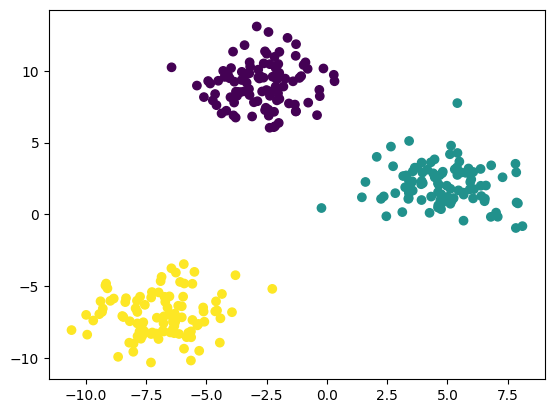

In [7]:
all_dots = pd.read_csv(FILE_PATH)
inspect_dataset(all_dots)

In [8]:
read_rows = fileDepth(FILE_PATH)
data_len  = fileWidth(FILE_PATH)
knn = 20
k = 3
print(f"Depth: {read_rows} | Width: {data_len}")

Depth: 300 | Width: 3


In [9]:
c = C(SO_FILE_PATH)
l = c.spectral(data_len, read_rows, FILE_PATH, knn, k_clusters=k)
m = c.kmeans(data_len, read_rows, FILE_PATH, k_clusters=k)


REQ_DATA_LEN: 3 	TRU_DATA_LEN: 3
REQ_N_ROWS  : 300 	TRU_N_ROWS  : 300+1

ORIGINAL DATASET: (x,y,target)
0	-7.568668 -8.154876 2.000000 
1	-8.170247 -7.456943 2.000000 
2	-1.275380 7.183021 0.000000 
3	4.313357 3.621335 1.000000 
4	-9.936814 -8.392239 2.000000 
5	5.926368 1.733262 1.000000 
6	-2.249426 9.592262 0.000000 
7	5.259276 1.127583 1.000000 
300x3 matrix. 8x3 printed.

k of clusters: 3

TRIMMED DATASET: (x,y)
0	-7.568668 -8.154876 
1	-8.170247 -7.456943 
2	-1.275380 7.183021 
3	4.313357 3.621335 
4	-9.936814 -8.392239 
5	5.926368 1.733262 
6	-2.249426 9.592262 
7	5.259276 1.127583 
300x2 matrix. 8x2 printed.

DISTANCES MATRIX:
0	0.000000 1.299511 21.631184 23.658236 2.605509 23.383175 23.066381 22.110401 
1	1.299511 0.000000 21.534830 23.561882 2.701863 23.286819 22.970028 22.014050 
2	21.631184 21.534830 0.000000 9.150423 24.236694 12.651506 3.383287 12.590094 
3	23.658236 23.561882 9.150423 0.000000 26.263744 3.501084 12.533710 3.439671 
4	2.605509 2.701863 24.236694 26.2637

In [10]:
all_dots = readCsv(FILE_PATH, read_rows)

cls = [int(dot[2]) for dot in all_dots]
cls_set = set(cls)
x = [dot[0] for dot in all_dots]
y = [dot[1] for dot in all_dots]

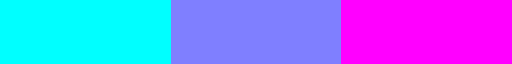

In [11]:
cool_resampled = mpl.colormaps['cool'].resampled(len(cls_set))
cool_resampled

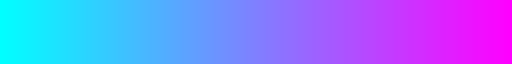

In [12]:
cool = mpl.colormaps['cool']
cool

Dots colored black have no assigned cluster.


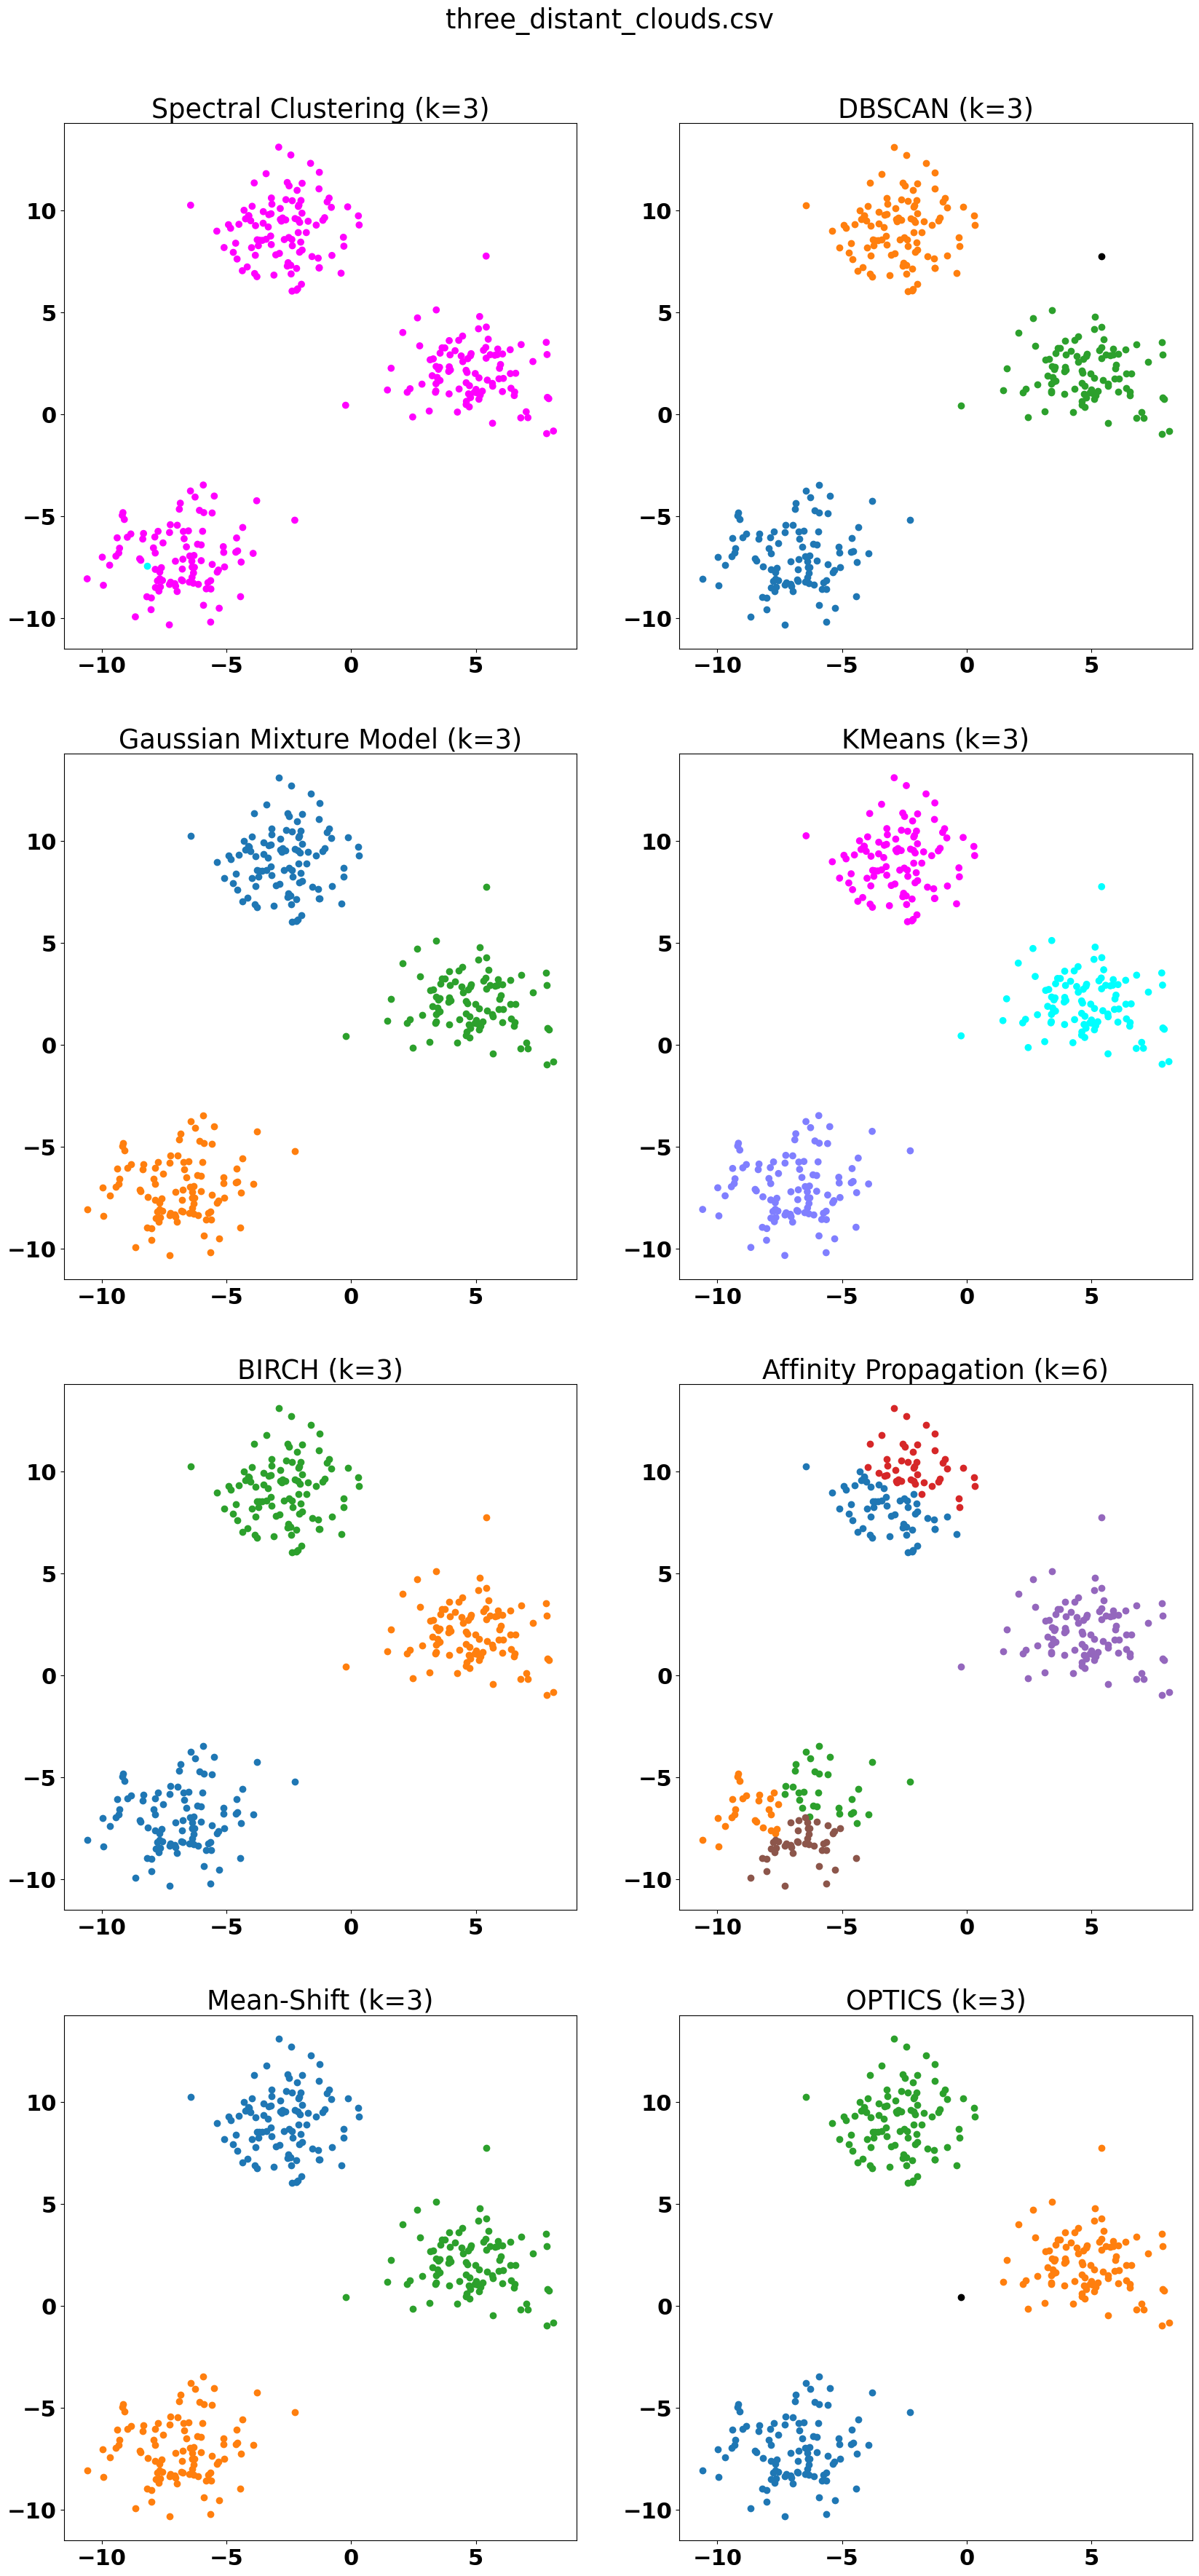

In [13]:
print("Dots colored black have no assigned cluster.")
fig, axis = setupMPL(FILE_NAME, COLS, ROWS, list(cls_set), cool_resampled)

l_spectral = l
plotSPECTRAL(fig, axis, 0,0, x,y, l_spectral, cool, f"Spectral Clustering (k={k})")

l_dbscan = dbscan(all_dots, eps=2.5, min_samples=knn) # no need for number of clusters (k)
k_dbscan = k_clusters(l_dbscan)
plotDBSCAN(fig, axis, 0,1, x,y, l_dbscan, all_dots, f"DBSCAN (k={k_dbscan})")

l_gaussian = gaussian(all_dots, k=k)
plotGaussian(fig, axis, 1,0, x,y, l_gaussian, all_dots, f"Gaussian Mixture Model (k={k})")

l_kmeans = m
plotKMEANS(fig, axis, 1,1, x,y, l_kmeans, cool, f"KMeans (k={k})")

l_birch = birch(all_dots, threshold=0.03, n=k)
plotBIRCH(fig, axis, 2,0, x,y, l_birch, all_dots, f"BIRCH (k={k})")

l_affinity = affinity(all_dots, 0.7) # no need for number of clusters (k)
k_affinity = k_clusters(l_affinity)
plotAffinity(fig, axis, 2,1, x,y, l_affinity, all_dots, f"Affinity Propagation (k={k_affinity})")

l_mean = mean(all_dots) # no need for number of clusters (k) | bad on large scale datasets
k_mean = k_clusters(l_mean)
plotMEAN(fig, axis, 3,0, x,y, l_mean, all_dots, f"Mean-Shift (k={k_mean})")

l_optics = optics(all_dots, eps=0.5, min_samples=25) # no need for number of clusters (k)
k_optics = k_clusters(l_optics)
plotOPTICS(fig, axis, 3,1, x,y, l_optics, all_dots, f"OPTICS (k={k_optics})")
plt.show()